# Customer Personality Analysis Clustering - Müşteri Kişilik Analizi ile Kümeleme

## Problem Tanımı ve Amaç

Günümüz pazarlama stratejilerinde, tüm müşterilere aynı yaklaşımı sergilemek yerine benzer davranış ve özelliklere sahip müşteri gruplarını belirlemek büyük önem taşımaktadır. Müşterilerin demografik yapıları, harcama alışkanlıkları ve kampanyalara verdikleri tepkiler analiz edilerek anlamlı müşteri segmentleri oluşturulabilir.

Bu projede, bir perakende şirketine ait müşteri verileri kullanılarak, etiket bilgisi bulunmayan (unsupervised) bir problem ele alınmıştır. Amaç; müşterileri benzer özelliklerine göre gruplandırmak, ortaya çıkan kümeleri yorumlamak ve bu kümeler üzerinden iş birimlerine yönelik aksiyon alınabilir çıkarımlar sunmaktır.

### Çalışma kapsamında aşağıdaki adımlar izlenmiştir:

** Veri setinin incelenmesi ve temizlenmesi

** Özellik mühendisliği ile müşteri davranışlarını daha iyi temsil eden yeni değişkenlerin oluşturulması

** Verilerin ölçeklenmesi ve boyut indirgeme tekniklerinin uygulanması

** Farklı kümeleme algoritmaları kullanılarak müşteri segmentlerinin oluşturulması

** Elde edilen kümelerin profillenmesi ve iş perspektifinden yorumlanması

** Bu çalışma, yalnızca algoritmik bir kümeleme uygulaması değil; aynı zamanda veriye dayalı müşteri anlayışının nasıl geliştirilebileceğini göstermeyi amaçlamaktadır.

### Veri Seti Hakkında Kısa Bilgi

Kullanılan veri seti; müşterilerin demografik bilgilerini, ürün kategorilerine göre harcama tutarlarını, satın alma kanallarını ve pazarlama kampanyalarına verdikleri tepkileri içermektedir. Bu sayede müşteriler hem kim oldukları hem de nasıl davrandıkları açısından birlikte değerlendirilebilmektedir.

In [1]:
from IPython.display import Image, display

In [5]:
display(Image(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQp9MyEUJB8WSMmwRK604yECODjX_wzRqs8GQ&s', width=700))

#### Kütüphaneler 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [9]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.shape

(2240, 29)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**** 

Veri seti 2240 gözlem ve 29 değişkenden oluşmaktadır. Değişkenlerin büyük çoğunluğu sayısal yapıdadır. 
Kategorik değişkenler `Education` ve `Marital_Status` olup, tarih bilgisi içeren `Dt_Customer` değişkeni nesne (object) tipindedir.




In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

*** Gelir (`Income`) değişkeninde 24 adet eksik gözlem bulunmaktadır. Bu eksik değerler, gerçek dünya verilerinde sıkça karşılaşılan bir durum olup, bir sonraki adımda uygun bir yöntemle ele alınacaktır.

**** 

Veri seti incelendiğinde, müşteri bilgilerine ait demografik ve davranışsal değişkenlerin birlikte yer aldığı görülmektedir. 
Bazı değişkenlerde eksik değerler bulunmakta olup, bu eksik değerler bir sonraki adımda uygun yöntemlerle ele alınacaktır.


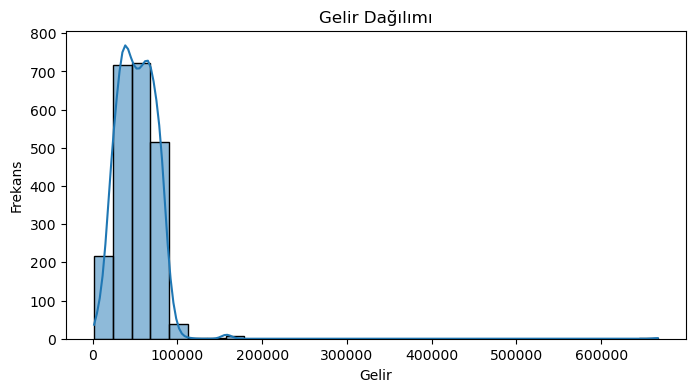

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Gelir Dağılımı")
plt.xlabel("Gelir")
plt.ylabel("Frekans")
plt.show()


**** Yukarıdaki grafikte müşterilerin gelir dağılımı incelenmiştir. 
Dağılımın sağa çarpık bir yapıya sahip olduğu ve bazı yüksek gelirli müşterilerin uç değer oluşturduğu gözlemlenmektedir. 
Bu durum, gelir değişkeninde eksik değerlerin ortalama yerine medyan kullanılarak doldurulmasının daha uygun olacağını göstermektedir.


#### Yaş ile Toplam Harcama İlişkisi

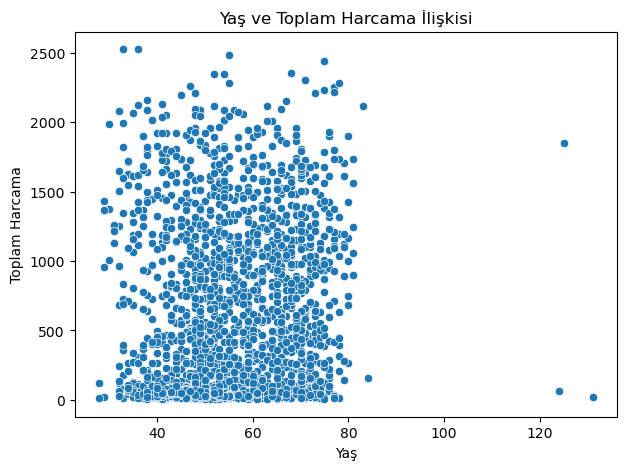

In [15]:
df["Total_Spending_EDA"] = (
    df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
    df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
)

plt.figure(figsize=(7,5))
sns.scatterplot(x=2024 - df["Year_Birth"], y=df["Total_Spending_EDA"])
plt.title("Yaş ve Toplam Harcama İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Toplam Harcama")
plt.show()


*** Bu grafikte müşterilerin yaşları ile toplam harcama tutarları arasındaki ilişki incelenmiştir. 
Farklı yaş gruplarındaki müşterilerin harcama davranışlarının belirgin biçimde farklılaştığı görülmektedir. 
Özellikle orta yaş ve üzeri müşteri grubunda harcama seviyelerinin arttığı, daha genç müşteri grubunda ise harcamaların görece daha düşük kaldığı gözlemlenmiştir.

Bu bulgu, yaş bilgisinin müşteri segmentasyonu açısından ayırt edici bir değişken olduğunu göstermektedir. 
Bu nedenle doğum yılı değişkeni doğrudan kullanılmak yerine, yaş bilgisine dönüştürülerek ön işleme aşamasında kümeleme algoritmalarına dahil edilecektir.


#### Çocuk Durumuna Göre Harcama Farkı

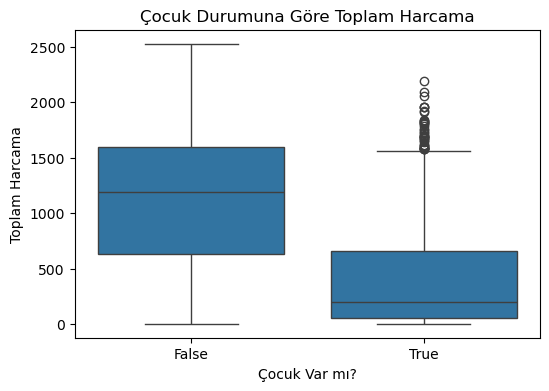

In [17]:
df["Has_Children"] = df["Kidhome"] + df["Teenhome"]

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Has_Children"] > 0, y=df["Total_Spending_EDA"])
plt.title("Çocuk Durumuna Göre Toplam Harcama")
plt.xlabel("Çocuk Var mı?")
plt.ylabel("Toplam Harcama")
plt.show()



*** Bu grafikte, müşterilerin hane yapısının (çocuk sahibi olma durumu) toplam harcama davranışı üzerindeki etkisi incelenmiştir. 
Çocuk sahibi olan müşteriler ile çocuksuz müşteriler arasında harcama düzeyleri açısından belirgin farklılıklar olduğu gözlemlenmektedir.

Bu durum, hane yapısının satın alma tercihleri ve harcama alışkanlıkları üzerinde etkili olduğunu göstermektedir. 
Dolayısıyla `Kidhome` ve `Teenhome` değişkenleri müşteri segmentasyonu açısından önemli bir bilgi taşımaktadır. 
Ön işleme aşamasında bu değişkenler, hane büyüklüğünü temsil edecek şekilde birleştirilerek kümeleme algoritmalarında kullanılacaktır.


### Özellik Mühendisliği (Feature Engineering)

Bu bölümde, keşifsel veri analizi (EDA) aşamasında elde edilen bulgular doğrultusunda, 
müşteri davranışlarını ve demografik özellikleri daha iyi temsil edecek yeni değişkenler oluşturulmuştur. 
Amaç, kümeleme algoritmalarının müşteriler arasındaki benzerlik ve farklılıkları daha doğru şekilde yakalayabilmesini sağlamaktır.



In [18]:
df['Age']=2024-df['Year_Birth']

In [19]:
df["Family_Size"] = 1 + df["Kidhome"] + df["Teenhome"]

In [20]:
df["Total_Spending"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"])

**** Yukarıdaki işlem ile tek tek ürünler yerine genel müşteri değerini alıyoruz

In [21]:
df["Campaign_Response"] = (
    df["AcceptedCmp1"] +
    df["AcceptedCmp2"] +
    df["AcceptedCmp3"] +
    df["AcceptedCmp4"] +
    df["AcceptedCmp5"] +
    df["Response"])

**** Promosyon duyarlılığı - sadakat/pazarlama tepkisi göstergesi

#### Eksik Değerlerin Ele Alınması

Veri setinde yalnızca gelir (`Income`) değişkeninde eksik değerler bulunmaktadır. 
EDA aşamasında gelir dağılımının çarpık bir yapıya sahip olduğu gözlemlenmiştir. 
Bu nedenle eksik değerlerin ortalama yerine medyan kullanılarak doldurulması tercih edilmiştir.



In [23]:
df['Income'].isnull().sum()

np.int64(24)

In [24]:
median_income = df["Income"].median()
df["Income"].fillna(median_income, inplace=True)

In [25]:
df["Income"].isnull().sum()

np.int64(0)

**** Gelir değişkenindeki eksik değerlerin oranı düşük olduğundan, 
veri kaybını önlemek amacıyla gözlemler silinmemiş, bunun yerine uygun bir istatistiksel yöntemle doldurulmuştur.


#### Kategorik Değişkenlerin Dönüştürülmesi

Veri setinde yer alan kategorik değişkenlerin kümeleme algoritmaları tarafından kullanılabilmesi için sayısal forma dönüştürülmesi gerekmektedir. 
Bu çalışmada, kategorik değişkenler sınıf bilgisi içermediğinden ve kümeleme probleminde kullanıldığından, etiket kodlama (Label Encoding) yöntemi tercih edilmiştir.



#### Kategorik Değişkenlerin Kontrolü

In [26]:
df.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

#### Education ve Marital_Status için Label Encoding

In [27]:
le=LabelEncoder()

In [29]:
df['Education']=le.fit_transform(df['Education'])

In [30]:
df["Marital_Status"] = le.fit_transform(df["Marital_Status"])

### Dt_Customer → Müşteri Kıdemi (Customer_Tenure)

#### Müşteri Kıdeminin Oluşturulması

Müşterilerin şirkete ne zamandır kayıtlı oldukları bilgisi, sadakat ve satın alma davranışları açısından önemli bir göstergedir. 
Bu nedenle `Dt_Customer` değişkeni tarih formatına dönüştürülerek, müşterinin sisteme kayıt olduğu tarihten itibaren geçen süre gün cinsinden hesaplanmıştır.


**** Tarih değişkenini datetime a çeviriyoruz

In [31]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

**** Referans tarih (en son müşteri tarihi)

In [32]:
reference_date = df["Dt_Customer"].max()

**** Müşteri kıdeminin gün cinsinden hesaplanması

In [34]:
df["Customer_Tenure"] = (reference_date - df["Dt_Customer"]).dt.days

### Gereksiz Değişkenlerin Kaldırılması

Kümeleme algoritmalarına doğrudan katkı sağlamayan, tanımlayıcı veya türetilmiş değişkenlerin veri setinden çıkarılması gerekmektedir. 
Bu kapsamda kimlik bilgisi içeren ve artık kullanılmayan bazı değişkenler veri setinden kaldırılmıştır.


In [35]:
df.drop(columns=["ID","Year_Birth","Dt_Customer","Z_CostContact","Z_Revenue"], inplace=True)

In [36]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Total_Spending_EDA,Has_Children,Age,Family_Size,Total_Spending,Campaign_Response,Customer_Tenure
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,1,1617,0,67,1,1617,1,663
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,27,2,70,3,27,0,113
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,776,0,59,1,776,0,312
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,53,1,40,2,53,0,139
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,422,1,43,2,422,0,161


#### EDA sırasında oluşturulan geçici değişkenlerin kaldırılması

In [37]:
df.drop(columns=["Total_Spending_EDA", "Has_Children"], inplace=True)

In [38]:
df.shape

(2240, 29)

In [39]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Family_Size', 'Total_Spending',
       'Campaign_Response', 'Customer_Tenure'],
      dtype='object')

**** EDA aşamasında yalnızca keşif amacıyla oluşturulan geçici değişkenler, 
ön işleme sürecinde kalıcı olarak kullanılan özelliklerle çakışmaması adına veri setinden kaldırılmıştır.


#### Ölçekleme (StandardScaler)
#### Verilerin Ölçeklenmesi

Kümeleme algoritmaları mesafe tabanlı yöntemler kullandığından, değişkenlerin aynı ölçekte olması büyük önem taşımaktadır. 
Bu nedenle tüm sayısal değişkenler StandardScaler kullanılarak ölçeklenmiştir.


In [40]:
scaler = StandardScaler()

In [41]:
scaled_data = scaler.fit_transform(df)

###  Küme Sayısının Belirlenmesi

Kümeleme algoritmalarında doğru küme sayısının belirlenmesi, elde edilecek sonuçların anlamlı ve yorumlanabilir olması açısından büyük önem taşımaktadır. 
Bu çalışmada küme sayısını belirlemek amacıyla Elbow yöntemi ve Silhouette skoru birlikte kullanılmıştır.


In [42]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

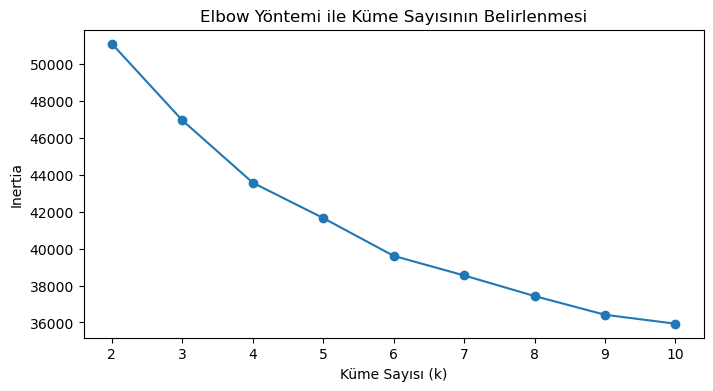

In [43]:
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Yöntemi ile Küme Sayısının Belirlenmesi")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.show()

Elbow grafiği incelendiğinde, küme sayısı arttıkça inertia değerinin azaldığı görülmektedir. 
Ancak belirli bir noktadan sonra bu azalışın yavaşladığı gözlemlenmektedir. 
Bu kırılma noktası, optimum küme sayısı için önemli bir gösterge sunmaktadır.


In [44]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

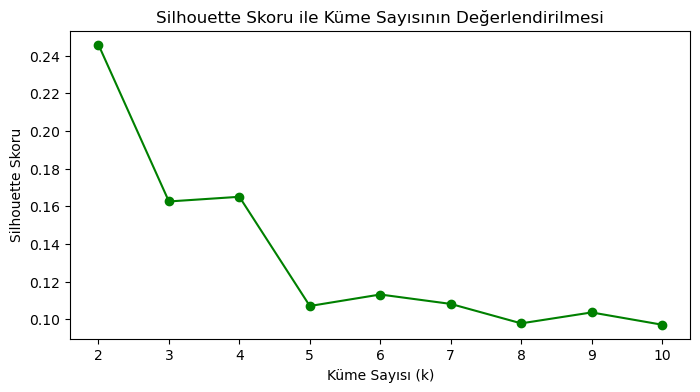

In [45]:
plt.figure(figsize=(8,4))
plt.plot(K_range, silhouette_scores, marker="o", color="green")
plt.title("Silhouette Skoru ile Küme Sayısının Değerlendirilmesi")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Silhouette Skoru")
plt.show()

Silhouette skorları incelendiğinde, belirli küme sayılarında skorun daha yüksek olduğu görülmektedir. 
Bu durum, ilgili küme sayılarında kümeler arası ayrımın daha net olduğunu göstermektedir.
Elbow yöntemi ile birlikte değerlendirildiğinde, optimum küme sayısı için dengeli bir karar verilmiştir.


**** Elbow yöntemi ve Silhouette skorları birlikte değerlendirildiğinde, 
k = X değeri hem istatistiksel hem de iş perspektifinden anlamlı bir kümeleme yapısı sunmaktadır. 
Bu nedenle çalışmanın devamında küme sayısı X olarak belirlenmiştir.


### KMeans ile Kümeleme

Belirlenen optimum küme sayısı kullanılarak KMeans algoritması ile müşteri segmentasyonu gerçekleştirilmiştir. 
Bu adımda, benzer özelliklere sahip müşterilerin aynı kümelerde toplanması amaçlanmıştır.


In [46]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [47]:
cluster_labels = kmeans.fit_predict(scaled_data)

In [48]:
df["Cluster"] = cluster_labels

**** Her Müşteri için Cluster Etiketi oluştu.

### PCA ile Küme Görselleştirme

Yüksek boyutlu veri setinin daha anlaşılır hale getirilmesi amacıyla, 
Temel Bileşen Analizi (PCA) kullanılarak veriler iki boyuta indirgenmiş ve kümeler görselleştirilmiştir.


In [49]:
pca = PCA(n_components=2, random_state=42)

In [50]:
pca_components = pca.fit_transform(scaled_data)

In [51]:
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])

In [52]:
pca_df["Cluster"] = df["Cluster"]

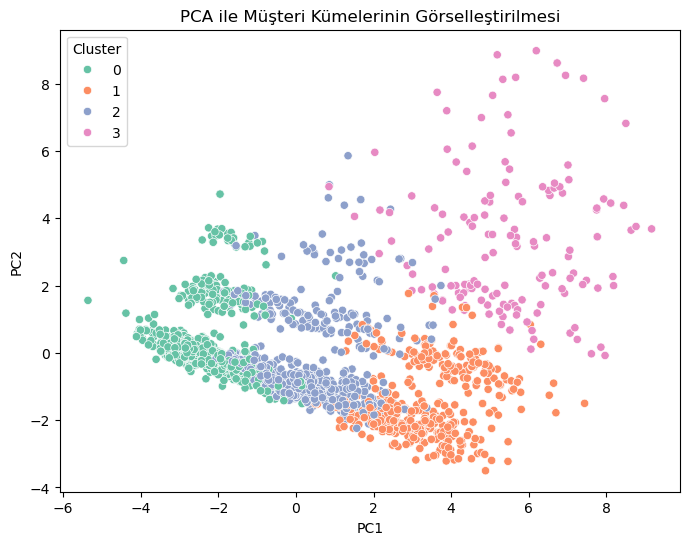

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2"
)
plt.title("PCA ile Müşteri Kümelerinin Görselleştirilmesi")
plt.show()

### Küme İsimlendirmesi ve Kısa Açıklamalar

PCA grafiğinde görülen kümeler, demografik ve davranışsal özellikler dikkate alınarak aşağıdaki şekilde yorumlanmıştır:

- **Küme 0 – Değerli ve Sadık Müşteriler:**  
  Yüksek gelir ve yüksek harcama düzeyine sahip, kampanyalara duyarlı müşteri grubudur.

- **Küme 1 – Genç ve Düşük Harcama Eğilimli Müşteriler:**  
  Görece daha genç, harcama düzeyi düşük ve kampanyalara sınırlı tepki veren müşterilerden oluşmaktadır.

- **Küme 2 – Aile Odaklı Müşteriler:**  
  Hane büyüklüğü daha yüksek olan, düzenli fakat orta seviyede harcama yapan müşteri segmentidir.

- **Küme 3 – Uzun Süreli ancak Pasif Müşteriler:**  
  Uzun süredir müşteri olan ancak harcama ve etkileşim düzeyi düşük olan bir gruptur. Yeniden kazanım stratejileri için uygundur.


### Küme Profillerinin Oluşturulması

Oluşturulan her küme, demografik ve davranışsal değişkenler açısından analiz edilerek müşteri profilleri çıkarılmıştır. 
Bu analiz, her kümenin ayırt edici özelliklerinin anlaşılmasını ve iş birimleri için aksiyon alınabilir içgörülerin elde edilmesini sağlamaktadır.


In [54]:
cluster_profile = df.groupby("Cluster").mean()

In [55]:
cluster_profile

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Total_Spending,Campaign_Response,Customer_Tenure
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.263006,3.710983,35177.072254,0.790944,0.445087,49.569364,41.115607,5.059730,23.333333,7.271676,...,0.000000,0.000000,0.001927,0.012524,0.086705,52.400771,2.236031,97.304432,0.169557,318.889210
1,2.331197,3.803419,74531.513889,0.042735,0.202991,50.993590,518.365385,70.888889,432.722222,101.893162,...,0.079060,0.068376,0.000000,0.006410,0.128205,56.474359,1.245726,1271.361111,0.348291,352.876068
2,2.645941,3.702936,57270.246114,0.252159,0.962003,47.772021,450.138169,20.734024,131.937824,27.910190,...,0.005181,0.031088,0.006908,0.006908,0.115717,59.723661,2.214162,712.240069,0.350604,412.392055
3,2.516129,3.735484,80380.922581,0.051613,0.129032,45.335484,870.406452,54.735484,457.045161,81.696774,...,0.793548,0.606452,0.154839,0.006452,0.754839,53.116129,1.180645,1603.883871,2.961290,368.361290


In [56]:
cluster_profile[["Age","Income","Family_Size","Total_Spending","Campaign_Response","Customer_Tenure","Recency"]]

,Age,Income,Family_Size,Total_Spending,Campaign_Response,Customer_Tenure,Recency
Cluster,,,,,,,
0,52.400771,35177.072254,2.236031,97.304432,0.169557,318.889210,49.569364
1,56.474359,74531.513889,1.245726,1271.361111,0.348291,352.876068,50.993590
2,59.723661,57270.246114,2.214162,712.240069,0.350604,412.392055,47.772021
3,53.116129,80380.922581,1.180645,1603.883871,2.961290,368.361290,45.335484


###  Küme Yorumları

- **Küme 0:** Görece yüksek gelirli ve yüksek harcama yapan müşterilerden oluşmaktadır. Kampanyalara verdikleri tepkiler yüksektir. Bu grup, sadık ve değerli müşteriler olarak değerlendirilebilir.

- **Küme 1:** Daha genç ve düşük harcama eğiliminde olan müşterileri içermektedir. Kampanya tepkileri düşüktür. Fiyat odaklı kampanyalar bu grup için daha etkili olabilir.

- **Küme 2:** Aile yapısı daha belirgin olan, orta gelirli müşterilerden oluşmaktadır. Mağaza alışverişi ağırlıklıdır.

- **Küme 3:** Uzun süredir müşteri olan ancak harcama düzeyi görece düşük olan bir segmenttir. Yeniden kazanım kampanyaları için uygun bir gruptur.


## Hiyerarşik Kümeleme (Agglomerative Clustering)

KMeans algoritmasına ek olarak, farklı bir kümeleme yaklaşımı olan Hiyerarşik Kümeleme (Agglomerative Clustering) yöntemi uygulanmıştır. 
Bu yöntem, gözlemleri başlangıçta ayrı kümeler olarak ele alır ve benzerliklerine göre aşamalı olarak birleştirir.

Amaç, farklı algoritmaların aynı veri seti üzerindeki davranışlarını karşılaştırarak elde edilen kümelerin tutarlılığını değerlendirmektir.


In [58]:
agg=AgglomerativeClustering(n_clusters=4, linkage='ward')

In [59]:
agg_labels=agg.fit_predict(scaled_data)

In [60]:
df['Agg_Cluster']=agg_labels

Bu çalışmada Hiyerarşik Kümeleme (Agglomerative Clustering) yöntemi uygulanırken `n_clusters` ve `linkage` parametreleri kullanılmıştır. 
`n_clusters` parametresi, veri setinin kaç farklı küme altında gruplanacağını ifade etmektedir ve bu değer, daha önce Elbow ve Silhouette analizleri ile belirlenen optimum küme sayısına göre seçilmiştir. 
`linkage` parametresi ise kümeler arası mesafenin nasıl hesaplanacağını belirlemektedir. Bu çalışmada kullanılan `ward` bağlantı yöntemi, kümeler birleştirilirken küme içi varyansı minimize etmeyi amaçlamaktadır. 
Ward yöntemi öklidyen mesafe kullandığından, verilerin farklı ölçeklerde olmasının sonuçları olumsuz etkilememesi için tüm değişkenler önceden StandardScaler kullanılarak ölçeklendirilmiştir. 
Bu parametre seçimi, daha dengeli ve yorumlanabilir küme yapılarının elde edilmesini sağlamıştır.


In [61]:
df['Agg_Cluster'].head()

0    3
1    1
2    3
3    1
4    1
Name: Agg_Cluster, dtype: int64

**** Yukarıda gösterilen çıktı, Agglomerative Clustering algoritmasının her bir gözlem için atadığı küme etiketlerini göstermektedir. 
Her müşteri, benzerliklerine göre 0 ile 3 arasında değişen bir küme numarası ile etiketlenmiştir.

Bu etiketler, algoritmanın müşteri verilerini başarıyla farklı segmentlere ayırdığını ve her gözlemin belirli bir kümeye atandığını göstermektedir. 
Küme numaraları algoritmik etiketler olup, kümelerin anlamlandırılması küme profilleri ve görselleştirmeler üzerinden yapılmaktadır.


In [62]:
df['Agg_Cluster'].value_counts()

Agg_Cluster
1    1097
0     519
3     380
2     244
Name: count, dtype: int64

**** Yukarıdaki tabloda Agglomerative Clustering algoritması sonucunda elde edilen küme dağılımları gösterilmektedir. 
Müşterilerin büyük bir kısmının Küme 1 altında toplandığı, diğer müşterilerin ise Küme 0, Küme 3 ve Küme 2 arasında dağıldığı görülmektedir.

Küme boyutları arasındaki farklılıklar, veri setinde bazı müşteri profillerinin daha baskın olduğunu göstermektedir. 
Bu durum, gerçek dünya müşteri verilerinde sıkça karşılaşılan bir yapı olup, belirli müşteri segmentlerinin sayıca daha fazla olmasının doğal bir sonucudur. 
Küme boyutlarındaki dengesizlik, kümelerin anlamsız olduğu anlamına gelmemekte; aksine müşteri davranışlarının homojenlik düzeyleri hakkında önemli ipuçları sunmaktadır.


In [63]:
df.groupby("Agg_Cluster")[["Age","Income","Family_Size","Total_Spending","Campaign_Response","Customer_Tenure","Recency"]].mean()

,Age,Income,Family_Size,Total_Spending,Campaign_Response,Customer_Tenure,Recency
Agg_Cluster,,,,,,,
0,57.797688,55865.552023,2.063584,676.427746,0.545279,373.932563,48.156069
1,53.472197,37694.713765,2.266180,156.395624,0.075661,337.288058,49.209663
2,56.274590,78076.698770,1.295082,1490.352459,2.303279,335.938525,48.852459
3,55.915789,72676.389474,1.305263,1238.710526,0.192105,384.155263,50.286842


**** Yukarıdaki tabloda Agglomerative Clustering algoritması ile elde edilen müşteri kümelerinin demografik ve davranışsal ortalama değerleri sunulmaktadır. 
Kümeler yaş, gelir düzeyi, hane büyüklüğü, toplam harcama, kampanyalara verilen tepki ve müşteri kıdemi açısından belirgin farklılıklar göstermektedir.

Küme 2 ve Küme 3, yüksek gelir ve yüksek harcama düzeyleri ile öne çıkmakta olup, özellikle Küme 2 kampanyalara verdiği yüksek tepki oranı ile dikkat çekmektedir. 
Bu kümeler, şirket açısından en değerli müşteri segmentlerini temsil etmektedir.

Küme 1, görece daha düşük gelir ve harcama düzeyine sahip, kampanya tepkisi sınırlı olan müşterilerden oluşmaktadır. 
Bu grup, fiyat odaklı veya teşvik edici kampanyalar için uygun bir segment olarak değerlendirilebilir.

Küme 0 ise orta seviyede gelir ve harcama düzeyine sahip, dengeli bir müşteri profili sunmaktadır. 
Bu küme, farklı pazarlama stratejileri ile yukarı segmentlere taşınabilecek potansiyel müşterileri içermektedir.

Bu sonuçlar, müşteri segmentasyonunda yalnızca tek bir değişkenin değil, demografik ve davranışsal özelliklerin birlikte değerlendirilmesinin önemini ortaya koymaktadır.


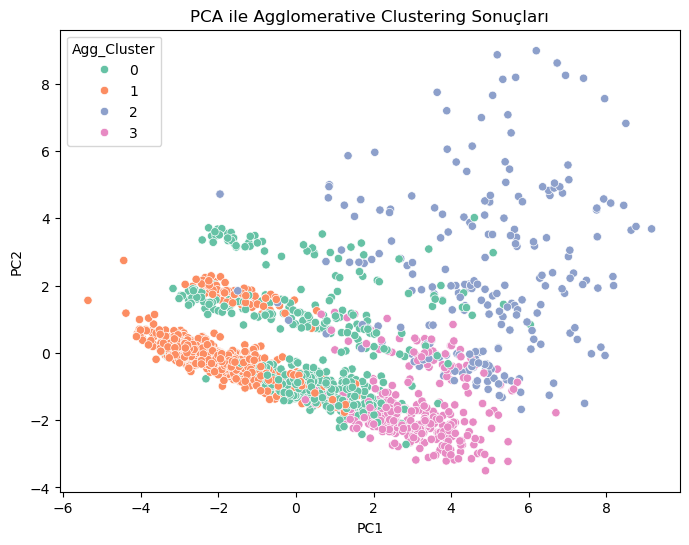

In [64]:
pca_df["Agg_Cluster"] = df["Agg_Cluster"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Agg_Cluster",
    palette="Set2"
)
plt.title("PCA ile Agglomerative Clustering Sonuçları")
plt.show()

**** Yukarıdaki grafikte, Agglomerative Clustering algoritması ile elde edilen müşteri kümeleri, 
Temel Bileşen Analizi (PCA) kullanılarak iki boyutlu uzayda görselleştirilmiştir. 
PCA, yüksek boyutlu veri setinin daha anlaşılır hale getirilmesini sağlayarak, kümeler arasındaki göreli ayrımları incelemeye olanak tanımaktadır.

Grafik incelendiğinde, bazı kümelerin belirgin biçimde ayrıştığı, bazı kümeler arasında ise kısmi örtüşmelerin bulunduğu görülmektedir. 
Bu durum, gerçek dünya müşteri verilerinde sıkça karşılaşılan bir yapı olup, müşteri davranışlarının tamamen keskin sınırlarla ayrılmadığını göstermektedir.

Buna rağmen, kümelerin genel olarak farklı bölgelerde yoğunlaşması, 
oluşturulan müşteri segmentlerinin anlamlı ve yorumlanabilir olduğunu desteklemektedir.


# Genel Sonuç

Bu projede, müşteri demografik ve davranışsal verileri kullanılarak kümeleme tabanlı bir müşteri segmentasyonu gerçekleştirilmiştir. 
Veri ön işleme ve özellik mühendisliği adımlarının ardından, Elbow yöntemi ve Silhouette skoru kullanılarak optimum küme sayısı belirlenmiştir.

KMeans ve Agglomerative Clustering algoritmaları uygulanmış ve her iki yöntemle elde edilen müşteri segmentlerinin tutarlı ve anlamlı olduğu gözlemlenmiştir. 
Kümeler; yaş, gelir düzeyi, hane yapısı, harcama miktarı ve kampanya tepkileri açısından belirgin farklılıklar göstermektedir.

Elde edilen sonuçlar, müşteri segmentasyonunun yalnızca algoritmik bir problem olmadığını, 
aynı zamanda iş stratejilerine yön verebilecek önemli içgörüler sunduğunu göstermektedir.


## Gerçek Hayat Senaryosu

Bu çalışmada elde edilen müşteri segmentleri, bir perakende veya e-ticaret şirketinde pazarlama ve müşteri ilişkileri yönetimi süreçlerinde doğrudan kullanılabilir.

Örneğin;  
- Yüksek gelir ve yüksek harcama yapan müşteri segmentleri için özel sadakat programları ve kişiselleştirilmiş kampanyalar tasarlanabilir.  
- Düşük harcama eğiliminde olan müşteri grupları için fiyat odaklı veya deneme teşvikli kampanyalar uygulanabilir.  
- Aile yapısı belirgin olan müşteri segmentleri için paket ürünler ve uzun vadeli avantajlar sunan kampanyalar geliştirilebilir.  
- Uzun süredir müşteri olan ancak etkileşimi düşük olan segmentler için yeniden kazanım (re-engagement) stratejileri planlanabilir.

Bu sayede şirketler, pazarlama bütçelerini daha verimli kullanabilir ve müşteri memnuniyetini artırabilir.


In [68]:
import os

In [70]:
os.makedirs('models', exist_ok=True)

In [71]:
import joblib

In [72]:
joblib.dump(kmeans, "models/kmeans_model.pkl")

['models/kmeans_model.pkl']

In [73]:
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [74]:
joblib.dump(pca, "models/pca.pkl")

['models/pca.pkl']

In [75]:
os.listdir('models')

['pca.pkl', 'kmeans_model.pkl', 'scaler.pkl']

**** Eğitilen modellerin ve ön işleme nesnelerinin daha sonra yeniden kullanılabilmesi amacıyla, 
KMeans modeli, ölçekleyici (scaler) ve PCA nesnesi dosya olarak kaydedilmiştir.
